<a href="https://colab.research.google.com/github/moons54/IA_P5/blob/main/P5_02_Notebook_Aurelien_MIMOUNI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
import math as math
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import preprocessing

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib as mpl 
import seaborn as sns


from sklearn import decomposition
from sklearn import preprocessing


import folium
from folium.features import DivIcon
from mpl_toolkits.mplot3d import Axes3D

# Outlier detection
from sklearn.ensemble import IsolationForest

# Save objects
import joblib


# Data table display for Pandas dataframes
from google.colab import data_table
%load_ext google.colab.data_table

import plotly.express as px
import datetime as dt
# machine learning
from sklearn import decomposition
from sklearn import preprocessing

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import confusion_matrix


The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [45]:

#repertoire courant
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
pd.set_option('display.max_column',163)
pd.set_option('display.max_row',163)
sellers = pd.read_csv('/content/drive/MyDrive/OC_Aurelien_MIMOUNI/P05_Aurélien_MIMOUNI/olist_sellers_dataset.csv')
products = pd.read_csv('/content/drive/MyDrive/OC_Aurelien_MIMOUNI/P05_Aurélien_MIMOUNI/olist_products_dataset.csv')
orders = pd.read_csv('/content/drive/MyDrive/OC_Aurelien_MIMOUNI/P05_Aurélien_MIMOUNI/olist_orders_dataset.csv',parse_dates=['order_purchase_timestamp','order_delivered_customer_date','order_estimated_delivery_date'],dayfirst=True)
order_reviews = pd.read_csv('/content/drive/MyDrive/OC_Aurelien_MIMOUNI/P05_Aurélien_MIMOUNI/olist_order_reviews_dataset.csv')
payments_order = pd.read_csv('/content/drive/MyDrive/OC_Aurelien_MIMOUNI/P05_Aurélien_MIMOUNI/olist_order_payments_dataset.csv')
orders_items = pd.read_csv('/content/drive/MyDrive/OC_Aurelien_MIMOUNI/P05_Aurélien_MIMOUNI/olist_order_items_dataset.csv')
geolocation = pd.read_csv('/content/drive/MyDrive/OC_Aurelien_MIMOUNI/P05_Aurélien_MIMOUNI/olist_geolocation_dataset.csv')
customers = pd.read_csv('/content/drive/MyDrive/OC_Aurelien_MIMOUNI/P05_Aurélien_MIMOUNI/olist_customers_dataset.csv')
product_name_cat = pd.read_csv('/content/drive/MyDrive/OC_Aurelien_MIMOUNI/P05_Aurélien_MIMOUNI/product_category_name_translation.csv')



In [70]:
table_segmentation = orders.copy()

# Reprise des datasets pour transformation

## Méthode traduction variable catégorie


In [71]:
def traductionCategorie(products):

  products.loc[~products['product_category_name'].isin(
      product_name_cat['product_category_name'])].dropna()
  
  product_name_cat.loc[71, :] = ['portateis_cozinha_e_preparadores_de_alimentos',
                          'portable_kitchen_and_food_preparers']

  products = pd.merge(products, product_name_cat, how='outer').drop(
    ['product_category_name'], axis=1)

  products = products.rename(columns={'product_category_name_english':
                                    'product_category_name'})
  return products


In [72]:
products = traductionCategorie(products)

In [73]:
products.head()

product_id  product_name_lenght  \
0  1e9e8ef04dbcff4541ed26657ea517e5                 40.0   
1  6a2fb4dd53d2cdb88e0432f1284a004c                 39.0   
2  0d009643171aee696f4733340bc2fdd0                 52.0   
3  b1eae565a61935e0011ee7682fef9dc9                 49.0   
4  8da90b37f0fb171b4877c124f965b1f6                 56.0   

   product_description_lenght  product_photos_qty  product_weight_g  \
0                       287.0                 1.0             225.0   
1                       346.0                 2.0             400.0   
2                       150.0                 1.0             422.0   
3                       460.0                 2.0             267.0   
4                       733.0                 3.0             377.0   

   product_length_cm  product_height_cm  product_width_cm  \
0               16.0               10.0              14.0   
1               27.0                5.0              20.0   
2               21.0               16.0              18.0   
3               17.0               13.0              17.0   
4               18.0               13.0              15.0   

  product_category_name  
0             perfumery  
1             perfumery  
2             perfumery  
3             perfumery  
4             perfumery

## Méthode fusion des tableau et transformation

In [74]:
def transformationTableau(table_segmentation):

  customers['customer_zip_code_prefix'] = \
  customers['customer_zip_code_prefix'].astype('category')

  geolocation['geolocation_zip_code_prefix'] = \
    geolocation['geolocation_zip_code_prefix'].astype('category')

  sellers['seller_zip_code_prefix'] = \
    sellers['seller_zip_code_prefix'].astype('category')

  order_reviews['review_answer_timestamp'] = \
    order_reviews['review_answer_timestamp'].astype('datetime64')

  order_reviews['review_creation_date'] = \
    order_reviews['review_creation_date'].astype('datetime64')

  orders_items['shipping_limit_date'] = \
    orders_items['shipping_limit_date'].astype('datetime64')

  orders['order_approved_at'] = \
    orders['order_approved_at'].astype('datetime64')

  orders['order_delivered_carrier_date'] = \
    orders['order_delivered_carrier_date'].astype('datetime64')

  orders['order_delivered_customer_date'] = \
    orders['order_delivered_customer_date'].astype('datetime64')

  orders['order_estimated_delivery_date'] = \
    orders['order_estimated_delivery_date'].astype('datetime64')

  orders['order_purchase_timestamp'] = \
    orders['order_purchase_timestamp'].astype('datetime64')


  #I keep only delivred transaction 
  table_segmentation = table_segmentation.loc[table_segmentation['order_status'] == 'delivered']

  #Fill_na for order_delivered_customer_date
  table_segmentation['order_delivered_customer_date'].fillna(
      table_segmentation['order_delivered_customer_date'].mean(), 
      inplace=True)
  #I add average order time
  table_segmentation['order_time'] = table_segmentation['order_delivered_customer_date'] -\
                              table_segmentation['order_purchase_timestamp']

  table_segmentation['order_time'] = table_segmentation['order_time'].apply(lambda x: x.days)

  #I add average order estimated time
  table_segmentation['estimated_order_time'] =table_segmentation['order_estimated_delivery_date'] -\
                              table_segmentation['order_purchase_timestamp']

  table_segmentation['estimated_order_time'] = table_segmentation['estimated_order_time'].apply(lambda x: x.days) 

  #I add order_time_error_prct
  table_segmentation['order_time_error_prct'] = table_segmentation['order_time'] - table_segmentation['estimated_order_time']

  table_segmentation['order_time_error_prct'] = table_segmentation['order_time_error_prct'] * 100 / (
      table_segmentation['estimated_order_time'])




  # Supprimer les colonnes inutiles
  table_segmentation= table_segmentation.drop(['order_approved_at', 'order_delivered_carrier_date',
                'order_delivered_customer_date', 'order_status'], axis=1)
  #I merge customers to table_segmentation
  table_segmentation = pd.merge(table_segmentation,
              customers,
              how='left')
  # I merge by zip code
  geol = geolocation.groupby('geolocation_zip_code_prefix').mean()

  custom = pd.merge(table_segmentation, 
                    geol, 
                    how='left', 
                    left_on='customer_zip_code_prefix', 
                    right_on='geolocation_zip_code_prefix')

  # I try tu reduce NA value, i complete joining by city
  geol2 = geolocation.groupby('geolocation_city').mean()

  custom2 = pd.merge(table_segmentation, 
                    geol2, 
                    how='left', 
                    left_on='customer_city', 
                    right_on='geolocation_city')

  index_na = custom.loc[custom['geolocation_lat'].isna()].index

  custom.loc[custom['geolocation_lat'].isna(),
            'geolocation_lat'] = custom2['geolocation_lat'].loc[index_na]

  custom.loc[custom['geolocation_lng'].isna(),
            'geolocation_lng'] = custom2['geolocation_lng'].loc[index_na]

  # Still 49 Nan, i try with states
  geol3 = geolocation.groupby('geolocation_state').mean()

  custom3 = pd.merge(table_segmentation, 
                    geol3, 
                    how='left', 
                    left_on='customer_state', 
                    right_on='geolocation_state')

  index_na = custom.loc[custom['geolocation_lat'].isna()].index

  custom.loc[custom['geolocation_lat'].isna(),
            'geolocation_lat'] = custom3['geolocation_lat'].loc[index_na]

  custom.loc[custom['geolocation_lng'].isna(),
            'geolocation_lng'] = custom3['geolocation_lng'].loc[index_na]

  table_segmentation = custom

    
  # I drop zip code
  table_segmentation = table_segmentation.drop('customer_zip_code_prefix', axis=1)
  # I merge df with order_reviews
  table_segmentation = pd.merge(table_segmentation,
                order_reviews[['order_id', 'review_score']],
                how='left')

  # First purchase date
  table_segmentation['first_purchase_date'] = table_segmentation['order_purchase_timestamp']
  # I merge df and order_payments
  table_segmentation = pd.merge(table_segmentation,
                payments_order[['order_id', 'payment_type',
                                'payment_installments']],
                how='left')

  # I remove NA
  table_segmentation.fillna(value={'payment_type': 'credit_card',
                  'payment_installments': 1},
            inplace=True)
  # I create price_order dataframe
  price_order = orders_items.groupby('order_id').sum()[['price']].reset_index()

  # I merge df and price_order
  table_segmentation = pd.merge(table_segmentation, 
                price_order, 
                how='left')


  # I merge df with order_item
  df_product = pd.merge(table_segmentation,
                        orders_items[['order_id', 'product_id']],
                        how='left')

  basket_size_order = df_product.groupby(
      'order_id').count()['product_id'].reset_index()

  basket_size_order = basket_size_order.rename(
      columns={'product_id': 'avg_basket_size'})

  table_segmentation = pd.merge(table_segmentation,
                basket_size_order,
                how='left') 
  # I create freight dataframe
  freight = orders_items.groupby('order_id').sum()[['freight_value']].reset_index()

  # I merge table_segmentation and seller
  table_segmentation = pd.merge(table_segmentation, 
                freight, 
                how='left')
  # I create seller dataframe 
  seller = orders_items.groupby(
      'order_id').first()[['seller_id']].reset_index()

  # I merge table_segmentation and seller
  table_segmentation = pd.merge(table_segmentation, 
                seller, 
                how='left')
  # I rename feature seller_id to favourite_seller
  table_segmentation = table_segmentation.rename(columns={'seller_id': 'favourite_seller'})
  # I create df_categ
  df_categ = pd.merge(df_product,
                      products[['product_id', 'product_category_name']],
                      how='left')

  # I remove NA
  df_categ.fillna(value={'product_category_name': 'Unknown'}, inplace=True)

  # I groupby df_categ by customer unique id
  df_categ = df_categ.groupby(
      'customer_unique_id').first()['product_category_name'].reset_index()

  # I rename feature product_category_name in favourite_categ
  df_categ = df_categ.rename(
      columns={'product_category_name': 'favourite_categ'})

  # I merge with table_segmentation
  table_segmentation = pd.merge(table_segmentation,
                df_categ,
                how='left')
  # I create df_volume
  df_volume = pd.merge(df_product,
                      products[['product_id', 'product_length_cm',
                                'product_height_cm', 'product_width_cm']],
                      how='left')

  # I remove NA
  df_volume.fillna(df_volume.median(), inplace=True)

  # I groupby df_categ by customer unique id
  df_volume['avg_volume_L'] = df_volume['product_length_cm'] * \
                              df_volume['product_height_cm'] * \
                              df_volume['product_width_cm'] / 1000

  # I rename feature product_category_name in favourite_categ
  df_volume = df_volume.groupby(
      'customer_unique_id').mean()['avg_volume_L'].reset_index()

  # I merge with df
  table_segmentation = pd.merge(table_segmentation,
                df_volume,
                how='left')
  return table_segmentation

In [75]:
table_segmentation_transfo = transformationTableau(table_segmentation)

In [53]:
table_segmentation_transfo.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_purchase_timestamp order_estimated_delivery_date  order_time  \
0      2017-10-02 10:56:33                    2017-10-18           8   
1      2017-10-02 10:56:33                    2017-10-18           8   
2      2017-10-02 10:56:33                    2017-10-18           8   
3      2018-07-24 20:41:37                    2018-08-13          13   
4      2018-08-08 08:38:49                    2018-09-04           9   

   estimated_order_time  order_time_error_prct  \
0                    15             -46.666667   
1                    15             -46.666667   
2                    15             -46.666667   
3                    19             -31.578947   
4                    26             -65.384615   

                 customer_unique_id customer_city customer_state  \
0  7c396fd4830fd04220f754e42b4e5bff     sao paulo             SP   
1  7c396fd4830fd04220f754e42b4e5bff     sao paulo             SP   
2  7c396fd4830fd04220f754e42b4e5bff     sao paulo             SP   
3  af07308b275d755c9edb36a90c618231     barreiras             BA   
4  3a653a41f6f9fc3d2a113cf8398680e8    vianopolis             GO   

   geolocation_lat  geolocation_lng  review_score first_purchase_date  \
0       -23.576983       -46.587161             4 2017-10-02 10:56:33   
1       -23.576983       -46.587161             4 2017-10-02 10:56:33   
2       -23.576983       -46.587161             4 2017-10-02 10:56:33   
3       -12.177924       -44.660711             4 2018-07-24 20:41:37   
4       -16.745150       -48.514783             5 2018-08-08 08:38:49   

  payment_type  payment_installments   price  avg_basket_size  freight_value  \
0  credit_card                   1.0   29.99                3           8.72   
1      voucher                   1.0   29.99                3           8.72   
2      voucher                   1.0   29.99                3           8.72   
3       boleto                   1.0  118.70                1          22.76   
4  credit_card                   3.0  159.90                1          19.22   

                   favourite_seller favourite_categ  avg_volume_L  
0  3504c0cb71d7fa48d967e0e4c94d59d9      housewares         2.280  
1  3504c0cb71d7fa48d967e0e4c94d59d9      housewares         2.280  
2  3504c0cb71d7fa48d967e0e4c94d59d9      housewares         2.280  
3  289cdb325fb7e7f891c38608bf9e0962       perfumery         4.693  
4  4869f7a5dfa277a7dca6462dcf3b52b2            auto         9.576

## Méthode regroupement tableau

In [80]:
def agregationTableau(table_segmentation):
   # Aggregation
  # I create an aggregation dictionnary
  dict_agg = {'customer_city': 'first',
              'customer_state': 'first',
              'customer_id': 'count',
              'price': 'mean',
              'order_time': 'mean',
              'estimated_order_time': 'mean',
              'avg_basket_size': 'mean',
              'order_purchase_timestamp': 'max',
              'first_purchase_date': 'min',
              'review_score': 'mean',
              'geolocation_lat': 'mean',
              'geolocation_lng': 'mean',
              'order_time_error_prct': 'mean',
              'freight_value': 'mean',
              'favourite_seller': 'first',
              'payment_type': 'first',
              'payment_installments': 'first'
            }

    # I group bu customer_unique_id then i aggragate with my dictionnary
  table_segmentation = table_segmentation.groupby(['customer_unique_id', 'favourite_categ',
                  'avg_volume_L']).agg(dict_agg)

  table_segmentation = table_segmentation.reset_index()

  table_segmentation = table_segmentation.rename(columns={'customer_id': 'nbr_of_order'})
  
  table_segmentation['days_since_purchase'] = max(
      table_segmentation['order_purchase_timestamp']) - table_segmentation['order_purchase_timestamp']

  # I create spend column
  table_segmentation['spend'] = table_segmentation['price'] * table_segmentation['nbr_of_order'] + \
                table_segmentation['freight_value']
  # I create freight_value_prct
  table_segmentation['freight_value_prct'] = table_segmentation['freight_value'] * 100 / table_segmentation['spend']

  table_segmentation.drop('freight_value', axis=1, inplace=True)

  table_segmentation['days_since_purchase'] = table_segmentation['days_since_purchase'].apply(lambda x: x.days)
  print( "Dimension du jeu de donnée ", table_segmentation.shape)
  print( "Nombre de feature ", table_segmentation.shape[1])
  print("Nombre d'observation",  table_segmentation.shape[0])
  return table_segmentation


In [81]:
tabl1 = agregationTableau(table_segmentation_transfo)

Dimension du jeu de donnée  (93358, 22)
Nombre de feature  22
Nombre d'observation 93358


In [56]:
tabl1.head()

customer_unique_id favourite_categ  avg_volume_L  \
0  0000366f3b9a7992bf8c76cfdf3221e2  bed_bath_table         7.616   
1  0000b849f77a49e4a4ce2b2a4ca5be3f   health_beauty         5.148   
2  0000f46a3911fa3c0805444483337064      stationery        43.750   
3  0000f6ccb0745a6a4b88665a16c9f078       telephony         1.045   
4  0004aac84e0df4da2b147fca70cf8255       telephony         0.528   

  customer_city customer_state  nbr_of_order   price  order_time  \
0       cajamar             SP             1  129.90         6.0   
1        osasco             SP             1   18.90         3.0   
2      sao jose             SC             1   69.00        25.0   
3         belem             PA             1   25.99        20.0   
4      sorocaba             SP             1  180.00        13.0   

   estimated_order_time  avg_basket_size order_purchase_timestamp  \
0                  10.0              1.0      2018-05-10 10:56:27   
1                   7.0              1.0      2018-05-07 11:11:27   
2                  27.0              1.0      2017-03-10 21:05:03   
3                  31.0              1.0      2017-10-12 20:29:41   
4                  20.0              1.0      2017-11-14 19:45:42   

  first_purchase_date  review_score  geolocation_lat  geolocation_lng  \
0 2018-05-10 10:56:27           5.0       -23.340235       -46.830140   
1 2018-05-07 11:11:27           4.0       -23.559115       -46.787626   
2 2017-03-10 21:05:03           3.0       -27.542880       -48.633426   
3 2017-10-12 20:29:41           4.0        -1.312214       -48.483159   
4 2017-11-14 19:45:42           5.0       -23.505548       -47.469705   

   order_time_error_prct  freight_value                  favourite_seller  \
0             -40.000000          12.00  da8622b14eb17ae2831f4ac5b9dab84a   
1             -57.142857           8.29  138dbe45fc62f1e244378131a6801526   
2              -7.407407          17.22  3d871de0142ce09b7081e2b9d1733cb1   
3             -35.483871          17.63  ef506c96320abeedfb894c34db06f478   
4             -35.000000          16.89  70a12e78e608ac31179aea7f8422044b   

  payment_type  payment_installments  days_since_purchase  
0  credit_card                   8.0                  111  
1  credit_card                   1.0                  114  
2  credit_card                   8.0                  536  
3  credit_card                   4.0                  320  
4  credit_card                   6.0                  287

## Methode regroupement catégorie

In [82]:
def regroupementFavouriteCategories(table_segmentation):
  dict_categories = {
  # home_garden_garage
  'bed_bath_table': 'home_garden_garage',
  'kitchen_dining_laundry_garden_furniture': 'home_garden_garage',
  'la_cuisine': 'home_garden_garage',
  'home_confort': 'home_garden_garage',
  'home_comfort_2': 'home_garden_garage',
  'portable_kitchen_and_food_preparers': 'home_garden_garage',
  'air_conditioning': 'home_garden_garage',
  'small_appliances': 'home_garden_garage',
  'small_appliances_home_oven_and_coffee': 'home_garden_garage',
  'home_appliances_2': 'home_garden_garage',
  'home_appliances': 'home_garden_garage',
  'housewares': 'home_garden_garage',
  'arts_and_craftmanship': 'home_garden_garage',
  'christmas_supplies': 'home_garden_garage',
  'furniture_decor': 'home_garden_garage',
  'art': 'home_garden_garage',
  'flowers' : 'home_garden_garage',
  'home_construction': 'home_garden_garage',
  'office_furniture': 'home_garden_garage',
  'furniture_living_room': 'home_garden_garage',
  'furniture_mattress_and_upholstery': 'home_garden_garage',
  'furniture_bedroom': 'home_garden_garage',
  'furnitures': 'home_garden_garage',   
  'construction_tools_construction': 'home_garden_garage',
  'costruction_tools_garden': 'home_garden_garage',
  'costruction_tools_tools': 'home_garden_garage',
  'construction_tools_safety': 'home_garden_garage',
  'construction_tools_lights': 'home_garden_garage',
  'signaling_and_security': 'home_garden_garage',
  'security_and_services': 'home_garden_garage',
  'auto': 'home_garden_garage',
  'garden_tools': 'home_garden_garage',
  

  # multimedia_leisure
  'telephony' : 'multimedia_leisure',
  'electronics': 'multimedia_leisure',
  'computers_accessories': 'multimedia_leisure',
  'consoles_games': 'multimedia_leisure',
  'fixed_telephony': 'multimedia_leisure',
  'audio': 'multimedia_leisure',
  'computers': 'multimedia_leisure',
  'tablets_printing_image': 'multimedia_leisure',
  'pc_gamer': 'multimedia_leisure',
  'sports_leisure' : 'multimedia_leisure',
  'musical_instruments': 'multimedia_leisure',
  'party_supplies': 'multimedia_leisure',
  'luggage_accessories': 'multimedia_leisure',
  'books' : 'multimedia_leisure',
  'books_imported': 'multimedia_leisure',
  'books_general_interest': 'multimedia_leisure',
  'books_technical': 'multimedia_leisure',
  'toys': 'multimedia_leisure',
  'cine_photo': 'multimedia_leisure',
  'cds_dvds_musicals': 'multimedia_leisure',
  'music': 'multimedia_leisure',
  'dvds_blu_ray': 'multimedia_leisure',
  'food_drink' : 'multimedia_leisure',
  'food' : 'multimedia_leisure',
  'drinks' : 'multimedia_leisure',
  'stationery' : 'multimedia_leisure',

  # fashion_health_beauty
  'watches_gifts' : 'fashion_health_beauty',
  'fashion_bags_accessories' : 'fashion_health_beauty',
  'fashion_underwear_beach' : 'fashion_health_beauty',
  'fashion_shoes' : 'fashion_health_beauty', 
  'fashion_male_clothing' : 'fashion_health_beauty',
  'fashio_female_clothing' : 'fashion_health_beauty',
  'fashion_sport' : 'fashion_health_beauty',
  'fashion_childrens_clothes' : 'fashion_health_beauty',
  'health_beauty' : 'fashion_health_beauty', 
  'diapers_and_hygiene' : 'fashion_health_beauty',
  'perfumery' : 'fashion_health_beauty',

  # other
  'baby': 'other',
  'Unknown' : 'other',
  'market_place' : 'other', 
  'cool_stuff' : 'other',
  'pet_shop' : 'other',
  'industry_commerce_and_business' : 'other',
  'agro_industry_and_commerce' : 'other'}

  table_segmentation['favourite_categ'] = table_segmentation['favourite_categ'].replace(
    dict_categories)
  return table_segmentation

In [83]:
tabl2 = regroupementFavouriteCategories(tabl1)

In [84]:
tabl2.drop(['favourite_seller'],axis=1,inplace=True)


## Methode traitement outlier 

In [89]:
def traitementOutlierIsoforest(table_segmentation):

  df_iso = table_segmentation.drop('customer_unique_id', axis=1)

  df_iso['favourite_categ'] = df_iso['favourite_categ'].astype(
      'category').cat.codes

  df_iso['order_purchase_timestamp'] = df_iso['order_purchase_timestamp'].map(dt.datetime.toordinal)


  df_iso['first_purchase_date'] = df_iso['first_purchase_date'].map(dt.datetime.toordinal)


  df_iso['payment_type'] = df_iso['payment_type'].astype('category').cat.codes

  df_iso['customer_city'] = df_iso['customer_city'].astype('category').cat.codes

  df_iso['customer_state'] = df_iso['customer_state'].astype('category').cat.codes


  
  clf = IsolationForest(random_state=0,
                        contamination=0.15).fit(df_iso)

  table_segmentation['outliers'] = pd.Series(clf.predict(df_iso), index=df_iso.index)


  # I drop last outliers (order_time < 0, freight > 80%)
  #df_iso = len(table_segmentation.loc[table_segmentation['outliers'] == -1])
  #table_segmentation = table_segmentation.drop(table_segmentation.loc[table_segmentation['outliers'] == -1].index)
  #table_segmentation = table_segmentation.drop('outliers', axis=1)

  outlier_index = table_segmentation.loc[table_segmentation['order_time'] < 0].index
  outlier_iqr = len(outlier_index)
  table_segmentation= table_segmentation.drop(outlier_index)

  outlier_index = table_segmentation.loc[table_segmentation['freight_value_prct'] > 80].index
  outlier_iqr = outlier_iqr + len(outlier_index)
  table_segmentation= table_segmentation.drop(outlier_index)

  outlier_index = table_segmentation.loc[table_segmentation['freight_value_prct'] == 0].index
  outlier_iqr = outlier_iqr + len(outlier_index)
  table_segmentation= table_segmentation.drop(outlier_index)

  outlier_index = table_segmentation.loc[table_segmentation['payment_installments'] < 1].index
  outlier_iqr = outlier_iqr + len(outlier_index)
  table_segmentation= table_segmentation.drop(outlier_index)

  print('Par isolation forest je supprime', len(table_segmentation.loc[table_segmentation['outliers'] == -1]), 'outliers')
  table_segmentation = table_segmentation.drop(table_segmentation.loc[table_segmentation['outliers'] == -1].index)
  table_segmentation = table_segmentation.drop('outliers', axis=1)
  return table_segmentation

In [91]:
table_segmentation = traitementOutlierIsoforest(tabl2)

Par isolation forest je supprime 13974 outliers


# Mise en place segmentation RFM

## Application RFM

In [392]:
def analyseTime(df, start, duration):
  # I transform start in datetime64
  start = np.datetime64(start, 's')

  # I transform duration in timedelta64
  duration = np.timedelta64(duration, 'D')

  df = df.loc[df['order_purchase_timestamp'] > start]
  end = start + duration
  df = df.loc[df['order_purchase_timestamp'] < end]

  

  return df

In [393]:
#df.info()

In [394]:
list_to_keep = ['price',
                'days_since_purchase',
                'nbr_of_order',
      #           'order_time',
                  'review_score'
    ]

X_total = table_segmentation[list_to_keep]
                             

In [395]:
X_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79031 entries, 0 to 93357
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                79031 non-null  float64
 1   days_since_purchase  79031 non-null  int64  
 2   nbr_of_order         79031 non-null  int64  
 3   review_score         79031 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 3.0 MB


In [396]:
X_total = pd.get_dummies(X_total)

In [397]:
X_total.reset_index()

index   price  days_since_purchase  nbr_of_order  review_score
0          0  129.90                  111             1           5.0
1          1   18.90                  114             1           4.0
2          2   69.00                  536             1           3.0
3          3   25.99                  320             1           4.0
4          4  180.00                  287             1           5.0
...      ...     ...                  ...           ...           ...
79026  93351   58.00                  254             1           5.0
79027  93352  149.00                  244             1           5.0
79028  93354   64.89                  261             1           4.0
79029  93356  115.00                  118             1           5.0
79030  93357   56.99                  483             1           5.0

[79031 rows x 5 columns]

In [398]:
pt = dict()
#Pre-processing
for c in X_total.columns:
    pt[c] = PowerTransformer()
    X_total.loc[:, c] = pt[c].fit_transform(np.array(X_total[c]).reshape(-1, 1))

try:
  X_total = X_total.drop('customer_state_other', axis=1)
except:
  print('column customer_state_other not in X_total')

try:
  X_total = X_total.drop('favourite_categ_other', axis=1)
except:
  print('column favourite_categ_other not in X_total')

column customer_state_other not in X_total
column favourite_categ_other not in X_total


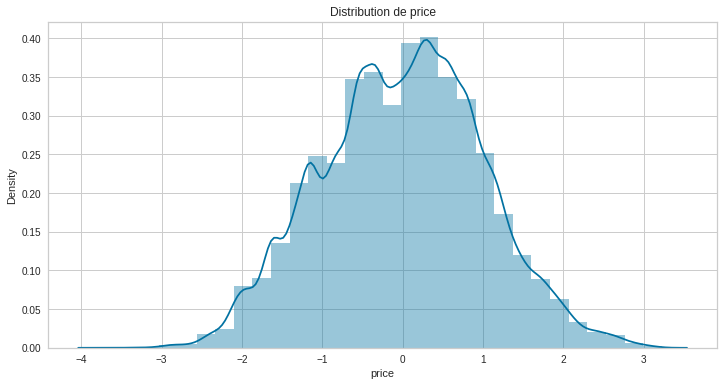

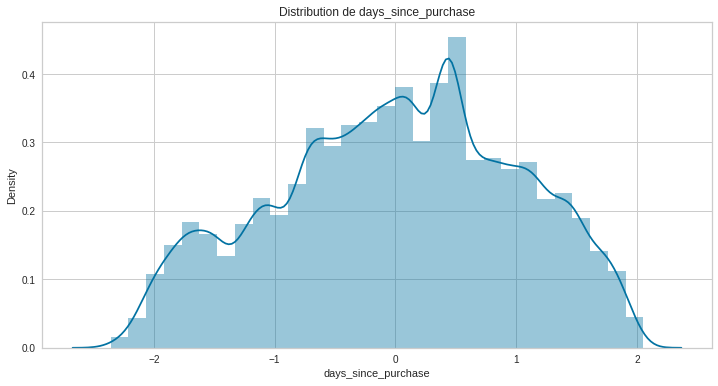

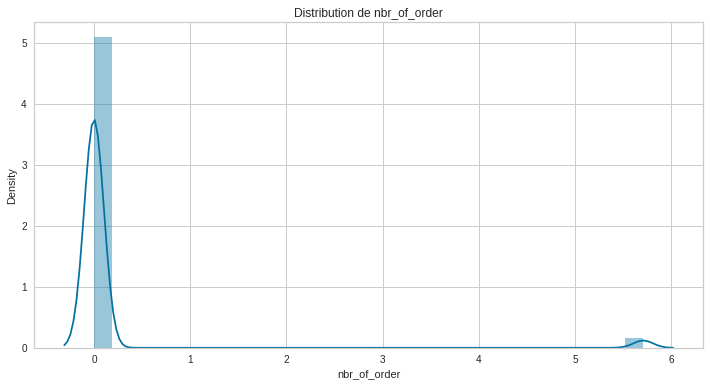

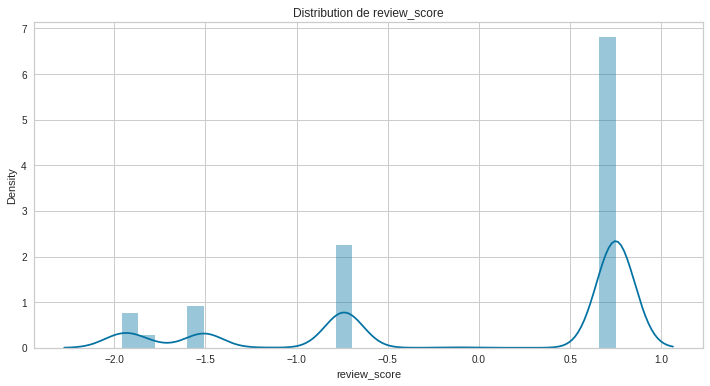

In [399]:
for column in X_total.select_dtypes(['int64', 'float64']).columns:
  if (X_total.select_dtypes(['int64', 'float64'])[column].nunique() > 1):
    plt.figure(figsize=(12,6))
    plt.title('Distribution de ' + column)
    sns.distplot(X_total[column].dropna(), bins=30)

In [400]:
X = X_total.sample(10000,random_state=0)

X = X.reset_index(drop=True)

In [401]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                10000 non-null  float64
 1   days_since_purchase  10000 non-null  float64
 2   nbr_of_order         10000 non-null  float64
 3   review_score         10000 non-null  float64
dtypes: float64(4)
memory usage: 312.6 KB


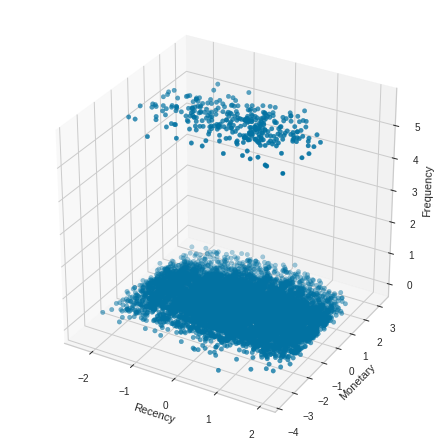

In [402]:
# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# Data for three-dimensional scattered points
xdata = X['days_since_purchase']
ydata = X['price']
zdata = X['nbr_of_order']

ax.set_xlabel('Recency')
ax.set_ylabel('Monetary')
ax.set_zlabel('Frequency')

ax.scatter3D(xdata, ydata, zdata);

In [403]:
def circleOfCorrelations(pc_infos, ebouli):
  """ The function below was created specifically for PCA, 
  plot circle of correlation."""
  plt.Circle((0,0),radius=10, color='g', fill=False)
  circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
  fig = plt.figure(figsize=(10,10))
  fig.gca().add_artist(circle1)
  for idx in range(len(pc_infos["PC-0"])):
    x = pc_infos["PC-0"][idx]
    y = pc_infos["PC-1"][idx]
    plt.plot([0.0,x],[0.0,y],'k-')
    plt.plot(x, y, 'rx')
    plt.annotate(pc_infos.index[idx], xy=(x,y))
  plt.xlabel("PC-0 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
  plt.ylabel("PC-1 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
  plt.xlim((-1,1))
  plt.ylim((-1,1))
  plt.title("Circle of Correlations")

def myPcaSupport(df):
  """
  The function below was created specifically for PCA, plot circle of correlation
  and eighenvalues 
  """
  fig = plt.figure(figsize=(10, 10))
  # Drop str col
  df = df.select_dtypes(include=['number'])
  # Drop na
  df = df.dropna()
	# Normalize data
  df_norm = (df - df.mean()) / df.std()
	# PCA
  pca = PCA(n_components='mle')
  pca_res = pca.fit_transform(df_norm.values)
  # Ebouli
  ebouli = pd.Series(pca.explained_variance_ratio_)
  ebouli.plot(kind='bar', title="Ebouli des valeurs propres")
  plt.show()
  # Circle of correlations
  coef = np.transpose(pca.components_)
  cols = ['PC-'+str(x) for x in range(len(ebouli))]
  pc_infos = pd.DataFrame(coef, columns=cols, index=df_norm.columns)
  circleOfCorrelations(pc_infos, ebouli)
  plt.show()

def myPCA(df_full, hue_column=0):
  """
  The function below was created specifically for PCA, plot circle of correlation
  and eighenvalues 
  """
  fig = plt.figure(figsize=(10, 10))
  # Drop str col
  df = df_full.select_dtypes(include=['number'])
  # Drop na
  df = df.dropna()
	# Normalize data
  df_norm = (df - df.mean()) / df.std()
	# PCA
  pca = PCA()
  pca_res = pca.fit_transform(df_norm.values)
  # Ebouli
  ebouli = pd.Series(pca.explained_variance_ratio_)
  # Circle of correlations
  coef = np.transpose(pca.components_)
  cols = ['PC-'+str(x) for x in range(len(ebouli))]
  # Plot PCA
  dat = pd.DataFrame(pca_res, columns=cols)
  dat['hue'] = hue_column
  sns.lmplot(x = "PC-0", y = "PC-1", data=dat, hue="hue", fit_reg=False,
            height=8.27, aspect=11.7/8.27, markers='x')
  plt.xlabel("PC-0 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
  plt.ylabel("PC-1 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
  plt.title("PCA") 
  plt.show()

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
  """
  Generate matrix plot of confusion matrix with pretty annotations.
  args: 
    y_true: true label of the data, with shape (nsamples,)
    y_pred: prediction of the data, with shape (nsamples,)
    filename: filename of figure file to save
    labels: string array, name the order of class labels in the confusion 
            matrix. Use `clf.classes_` if using scikit-learn models.
            with shape (nclass,).
    ymap: dict: any -> string, length == nclass.
          if not None, map the labels & ys to more understandable strings.
          Caution: original y_true, y_pred and labels must align.
    figsize: the size of the figure plotted.
  """
  if ymap is not None:
      y_pred = [ymap[yi] for yi in y_pred]
      y_true = [ymap[yi] for yi in y_true]
      labels = [ymap[yi] for yi in labels]
  cm = confusion_matrix(y_true, y_pred, labels=labels)
  cm_sum = np.sum(cm, axis=1, keepdims=True)
  cm_perc = cm / cm_sum.astype(float) * 100
  annot = np.empty_like(cm).astype(str)
  nrows, ncols = cm.shape
  for i in range(nrows):
      for j in range(ncols):
          c = cm[i, j]
          p = cm_perc[i, j]
          if i == j:
              s = cm_sum[i]
              annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
          elif c == 0:
              annot[i, j] = ''
          else:
              annot[i, j] = '%.1f%%\n%d' % (p, c)
  cm = pd.DataFrame(cm_perc, index=labels, columns=labels)
  cm.index.name = 'Actual'
  cm.columns.name = 'Predicted'
  fig, ax = plt.subplots(figsize=figsize)
  sns.heatmap(cm, annot=annot, fmt='', cmap='rocket_r', ax=ax)
  plt.show()


def name_cluster(df):
  """
  take the customer segmentation data frame with kmeans label and
  add a column cluster.
  name_cluster give a name to the cluster
  """
  
  label_data = df.groupby('label_kmeans').mean().reset_index().copy()

  label_data.loc[label_data['nbr_of_order'] == max(
      label_data['nbr_of_order']), 'cluster'] = 'Loyal'

  label_data.loc[label_data['days_since_purchase'] == min(
      label_data['days_since_purchase']), 'cluster'] = 'New'

  label_data.loc[label_data['price'] == max(
      label_data['price']),
      'cluster'] = 'Big'

  label_data.loc[label_data['cluster'].isna(),
                'cluster'] = 'Small'

  df = df.merge(label_data[['label_kmeans', 'cluster']],
                how='left')
  
  return df


def DbscanElbowVisualizer(X, metric='silhouette',
                          list_min_sample=range(3, 10),
                          list_eps=[0.2, 0.3, 0.4]):
  """
  return davies_bouldin score of a dataframe for eps
  and min_sample you want test.
  X the dataframe to fit
  list_min_sample the list of min sample to test
  list_eps the of eps to test
  """ 
  score = {}
  i = 0
  df_score = pd.DataFrame(index=list_min_sample)
  for j in list_eps:
      for k in list_min_sample:
          if metric == 'davies bouldin':
              score[k] = davies_bouldin_score(
                  X = X,
                  labels = DBSCAN(min_samples=k,
                                  eps=j).fit(X).labels_)
          elif metric == 'silhouette':
              score[k] = silhouette_score(
                  X = X,
                  labels = DBSCAN(min_samples=k,
                                  eps=j).fit(X).labels_)
          elif metric == 'k cluster':
              labels = DBSCAN(min_samples=k, eps=j).fit(X).labels_
              score[k] = len(set(labels)) - (1 if -1 in labels else 0)      
      df_score[i] = list(score.values())
      i += 1

  df_score.columns = list_eps
  plt.figure(figsize=(8,6)),
  plt.title(metric + ' score en fonction de min_sample')
  sn.lineplot(data=df_score)

  plt.show()

# Mise en place partitionnement predictif

## Utilisation de l'algorithme T-SNE

Objectif : 
___

- réduction des dimensions
- convertit les similarités entre points de donnée en probabilité jointes puistente de minimiser la divergence de Kullback-Leibler.
___
Avantage :
- Il preserve bien les groupes locaux
Inconvénient :
- Perte de l'information globale : distance entre les groupes perdent leur signification
- Il ne s'agit pas d'un algorithme dit deterministe




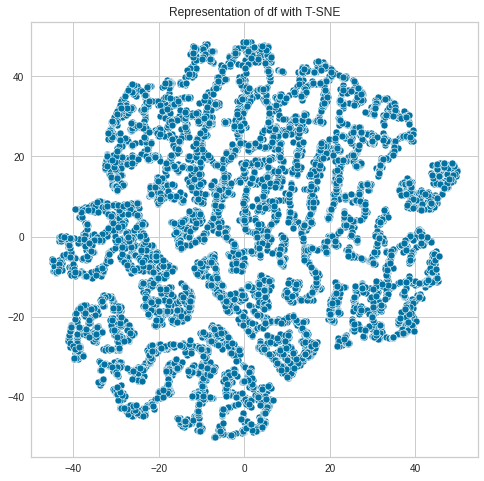

In [404]:
#visulation complementaire TSNE
tsne = TSNE(n_components=2,
            init='pca',
            n_iter=500,
            random_state=0)
T = tsne.fit_transform(X)

plt.figure(figsize=(8,8))
plt.title('Representation of df with T-SNE')
sns.scatterplot(T[:,0], T[:,1])

## Modèle KMEANS
___

 
> **Objectif** :
- Inspecter les charactéristique pour en déduire quels échantillons sont similaires
- Créer des grappes ou paquet pouvant être regroupé.
___

> **Fonctionnement** :
- Etape 1 : On choisit le nombre de cluster nommé k
- Etape 2 : le modèle choisit ensuite le nombre k de centroide qui affecte chacun des échantillons à une grappe en fonction de son éloignmeent par rapport a ce centroide
- Etape 3 : L'algorithme recalcule le centroide en se basen sur le centr de chacun des échantillons de la même grappe avec le même label.
- Etape 4 : L'affectation des échantillons à la grappe est répété à partir de ces nouveaux centroides
___
Résultat Attendu :
Au bout de quelques tous le résultat doit converger

Avantage :

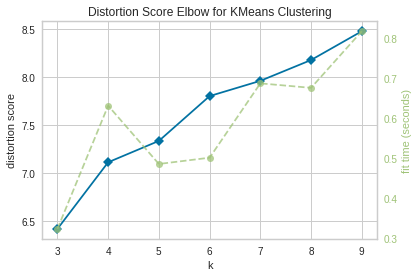

In [405]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,10))

visualizer.fit(X)
visualizer.poof()

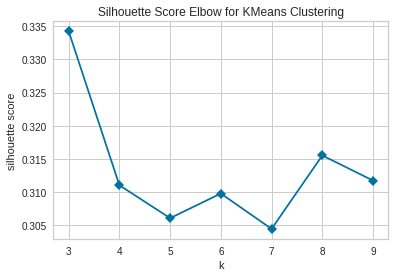

In [406]:
# Instantiate the clustering model and visualizer 
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3, 10),
                              metric='silhouette', timings=False)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof() 

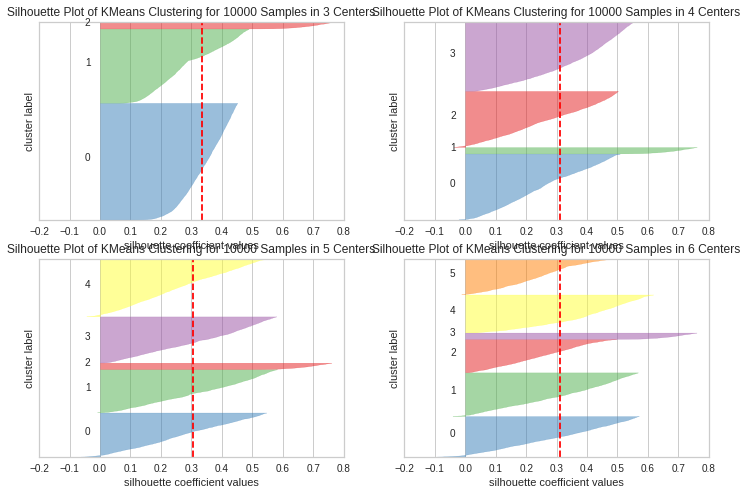

In [407]:
fig, axes = plt.subplots(2,2,figsize=(12,8))
axes = axes.reshape(4)
for i,k in enumerate(range(3,7)):
  ax = axes[i]
  sil = SilhouetteVisualizer(
      KMeans(n_clusters=k,random_state=0),
      ax=ax,
  )
  sil.fit(X)
  sil.finalize()
  ax.set_xlim(-0.2,0.8)


In [408]:
kmeans = KMeans(n_clusters=4, 
                verbose=1,
                init='k-means++', 
                random_state=0,
                n_jobs=-1).fit(X)

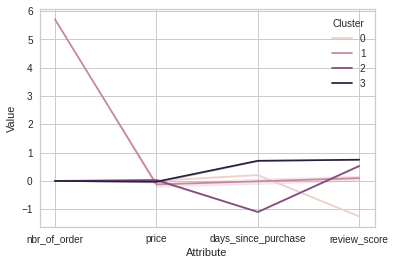

In [410]:
### utilisation Snake Plot
# Create the dataframe
df_normalized = pd.DataFrame(X, columns=['nbr_of_order', 'price', 'days_since_purchase','review_score'])
df_normalized['ID'] = X.index
df_normalized['Cluster'] = kmeans.labels_

# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['nbr_of_order','price','days_since_purchase','review_score'],
                      var_name='Attribute',
                      value_name='Value')

# Visualize it
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)



In [483]:
df_nor_melt

ID  Cluster     Attribute     Value
0         0        0  nbr_of_order  0.000000
1         1        2  nbr_of_order  0.000000
2         2        0  nbr_of_order  0.000000
3         3        3  nbr_of_order  0.000000
4         4        1  nbr_of_order  5.709952
...     ...      ...           ...       ...
39995  9995        3  review_score  0.748913
39996  9996        3  review_score  0.748913
39997  9997        2  review_score  0.748913
39998  9998        1  review_score  0.748913
39999  9999        3  review_score  0.748913

[40000 rows x 4 columns]

In [472]:
import plotly.express as px



fig = px.parallel_categories(df_nor_melt)

fig.show()

In [491]:
df_nor_melt

ID  Cluster     Attribute     Value
0         0        0  nbr_of_order  0.000000
1         1        2  nbr_of_order  0.000000
2         2        0  nbr_of_order  0.000000
3         3        3  nbr_of_order  0.000000
4         4        1  nbr_of_order  5.709952
...     ...      ...           ...       ...
39995  9995        3  review_score  0.748913
39996  9996        3  review_score  0.748913
39997  9997        2  review_score  0.748913
39998  9998        1  review_score  0.748913
39999  9999        3  review_score  0.748913

[40000 rows x 4 columns]

In [519]:
d0 =df_nor_melt[df_nor_melt['Cluster'] == 0]
d1 = df_nor_melt[df_nor_melt['Cluster'] == 1]
d2 = df_nor_melt[df_nor_melt['Cluster'] == 2]
d3 = df_nor_melt[df_nor_melt['Cluster'] == 3]


In [522]:
import plotly.graph_objects as go


fig = go.Figure(data=go.Scatterpolar(
  r=d0.Value,
  theta=d0.Attribute,
  fill='toself'
  #name='cluster 0'
))

fig.add_trace(go.Scatterpolar(
      r=d0.Value,
      theta=d0.Attribute,
      fill='toself',
      name='cluster 0'
))

fig.add_trace(go.Scatterpolar(
      r=d1.Value,
      theta=d1.Attribute,
      fill='toself',
      name='cluster 1'
))
fig.add_trace(go.Scatterpolar(
      r=d2.Value,
      theta=d2.Attribute,
      fill='toself',
      name='cluster 2'
))
fig.add_trace(go.Scatterpolar(
      r=d3.Value,
      theta=d3.Attribute,
      fill='toself',
      name='cluster 3'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=False
)



fig.show()

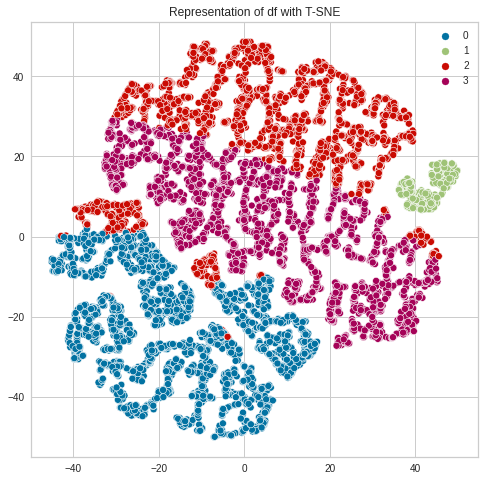

In [412]:
#Visualiser avec T-SNE

plt.figure(figsize=(8,8))
plt.title('Representation of df with T-SNE')
sns.scatterplot(data=T, x=T[:,0], y=T[:,1], hue=kmeans.labels_,
               palette=sns.color_palette(n_colors=4
                                         ))

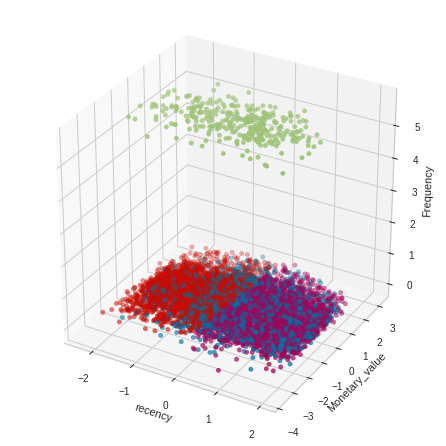

In [413]:
# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# Data for three-dimensional scattered points
xdata = X['days_since_purchase']
ydata = X['price']
zdata = X['nbr_of_order']

ax.set_xlabel('recency')
ax.set_ylabel('Monetary_value')
ax.set_zlabel('Frequency')

ax.scatter3D(xdata, ydata, zdata, c=kmeans.labels_,
             cmap=mpl.colors.ListedColormap(
                 sns.color_palette(n_colors=4).as_hex()));


##### Conclusion des clusters réalisés

- Cluster 0 : le montant des achats est en moyenne supèrieur a 180 euro, le nombre de jour de la commande est a plus de 180 jours 

- Cluster 1 : le montant des achats est en moyenne de 50 euro, le nombre de jour de la commande est plutot compris entre 6 mois et un an

- Cluster 2 : le montant des achats est en moyenne de 70 euro, le nombre de jour de la commande est plutot comprise entre 90 et 360 jr

- Cluster 3 : le montant des achats est en moyenne supèrieur a 180 euro, le nombre de jour de la commande est a plus de 180 jours. nombre de commande etant au minimum 2





## Modèle DBSCAN
___

 
> **Objectif** :
-Cet algorithme définit les clusters omme des régions continues de hautes densité
___

> **Fonctionnement** :
- Etape 1 : pour chaque observation, l'algorithme compte combien d'observation sont situés à moins de 'epsilon' de celle- ci.
- Etape 2 : lorsqu'une observation est à moins de min_sample observations dans son epsilon-voisinage alors on considère qu'il s'agit d'une observation coeur  ( core-instance) 
- Etape 3 : Toutes les observations au voisinage d'une observation coeur appartienne au même cluster. Il peut y avoir parmis elles d'autrs observations oceur par conséquent une longue observations coeurs voisine constitues un cluster unique.
- Etape 4 : Chaque observation qui n'est pas une observation coeur et n'en comporte pas une dans son voisinage est considéré comme une anomalie.

___
Résultat Attendu :
Au bout de quelques tous le résultat doit converger

Avantage :
Algorithme qui fonctionne bien si tous les clusters sont suffisamment dense si ils sont bien séparés par des zones de faible densité.

In [414]:
def DbscanElbowVisualizer(X, metric='silhouette',
                          list_min_sample=range(3, 10),
                          list_eps=[0.2, 0.3, 0.4]):
  """
  return davies_bouldin score of a dataframe for eps
  and min_sample you want test.
  X the dataframe to fit
  list_min_sample the list of min sample to test
  list_eps the of eps to test
  """ 
  score = {}
  i = 0
  df_score = pd.DataFrame(index=list_min_sample)
  for j in list_eps:
      for k in list_min_sample:
          if metric == 'davies bouldin':
              score[k] = davies_bouldin_score(
                  X = X,
                  labels = DBSCAN(min_samples=k,
                                  eps=j).fit(X).labels_)
          elif metric == 'silhouette':
              score[k] = silhouette_score(
                  X = X,
                  labels = DBSCAN(min_samples=k,
                                  eps=j).fit(X).labels_)
          elif metric == 'k cluster':
              labels = DBSCAN(min_samples=k, eps=j).fit(X).labels_
              score[k] = len(set(labels)) - (1 if -1 in labels else 0)      
      df_score[i] = list(score.values())
      i += 1

  df_score.columns = list_eps
  plt.figure(figsize=(8,6)),
  plt.title(metric + ' score en fonction de min_sample')
  sns.lineplot(data=df_score)

  plt.show()

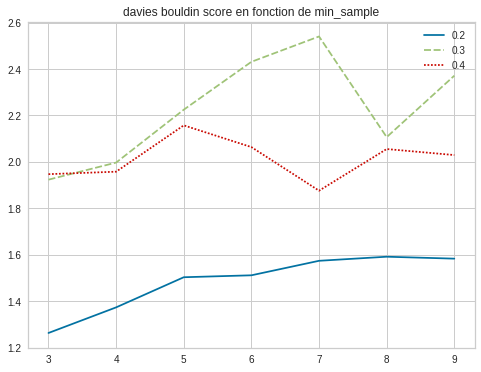

In [415]:
DbscanElbowVisualizer(X, 'davies bouldin', range(3, 10), [0.2, 0.3, 0.4])

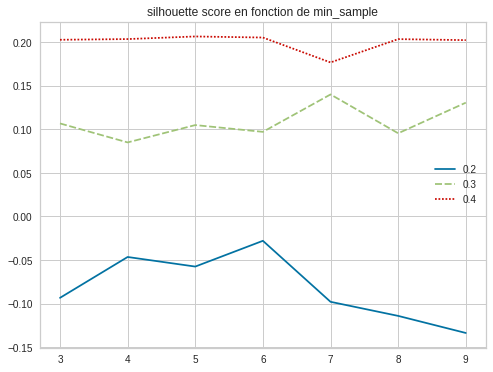

In [416]:
DbscanElbowVisualizer(X, 'silhouette', range(3, 10), [0.2, 0.3, 0.4])

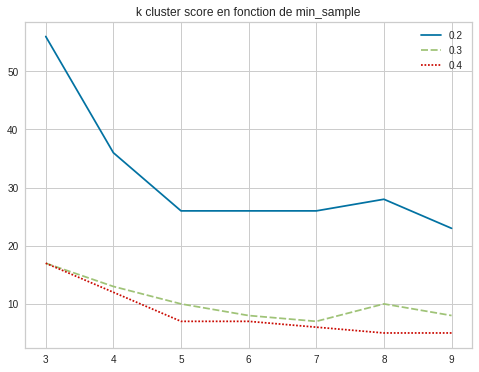

In [417]:
DbscanElbowVisualizer(X, 'k cluster', range(3, 10), [0.2, 0.3, 0.4])

In [418]:
dbs = DBSCAN(eps = 0.3, 
             min_samples=9,
             n_jobs=-1).fit(X.copy())

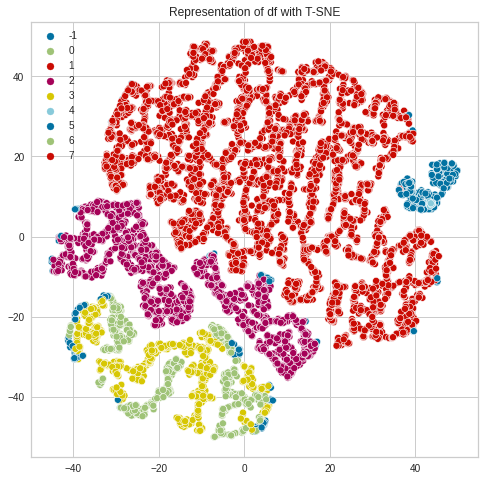

In [419]:
plt.figure(figsize=(8,8))
plt.title('Representation of df with T-SNE')
sns.scatterplot(data=T, x=T[:,0], y=T[:,1], hue=dbs.labels_,
               palette=sns.color_palette(n_colors=len(set(dbs.labels_))))

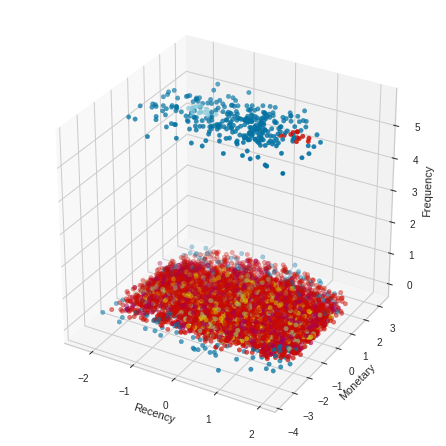

In [420]:
# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# Data for three-dimensional scattered points
zdata = X['nbr_of_order']
xdata = X['days_since_purchase']
ydata = X['price']

ax.set_xlabel('Recency')
ax.set_ylabel('Monetary')
ax.set_zlabel('Frequency')

ax.scatter3D(xdata, ydata, zdata, c=dbs.labels_,
             cmap=mpl.colors.ListedColormap(
                 sns.color_palette(n_colors=len(set(dbs.labels_))).as_hex()))

### Conclusion DBSCAN

- Nous constatons que les clusters ne ressorte pas de manière heterogene et de manière equilibré.

sur l'analyse des groupe :
Cela indiquerait par exmple un client ayant dépensé récemment appartient au meme groupe que celui ayant fait tres peu de transaction, il en va de meme des montants.
Une différenciation importante est faite sur le groupe dès l'instant ou celui ci a fait plusieurs transaction)

## Controle periodicite sur une année ( 2017)

In [435]:
## periode de reference 20
data_ref = analyseTime(table_segmentation,'2017-03',180)

In [436]:
def newRFM(table_segmentation):
  list_to_keep = ['price',
                  'days_since_purchase',
                  'nbr_of_order',
                  'review_score',
                  #'order_time'
                  ]

  X_total = table_segmentation[list_to_keep]
  return X_total

In [437]:
data_ref = newRFM(data_ref)

In [438]:
def preprocessing(X_total):
  pt = dict()
  #Pre-processing
  for c in X_total.columns:
      pt[c] = PowerTransformer()
      X_total.loc[:, c] = pt[c].fit_transform(np.array(X_total[c]).reshape(-1, 1))

  try:
    X_total = X_total.drop('customer_state_other', axis=1)
  except:
    print('column customer_state_other not in X_total')

  try:
    X_total = X_total.drop('favourite_categ_other', axis=1)
  except:
    print('column favourite_categ_other not in X_total')
  return X_total

In [439]:
X_total = preprocessing(data_ref)

column customer_state_other not in X_total
column favourite_categ_other not in X_total


In [440]:

label_pred = data_ref.copy()
label_true = data_ref.copy()

In [441]:
#def AriScore(X_total):
kmeans_reference_year = KMeans(n_clusters=5, 
                    verbose=1,
                    init='k-means++',
                    random_state=0,
                    n_jobs=-1).fit(X_total)

label_pred['label_kmeans'] = kmeans.predict(X_total)
label_true['label_kmeans'] = kmeans_reference_year.predict(X_total)

label_pred = name_cluster(label_pred)
label_true = name_cluster(label_true)

adjusted_rand_score(label_true['cluster'], label_pred['cluster'])

0.5746196226477474

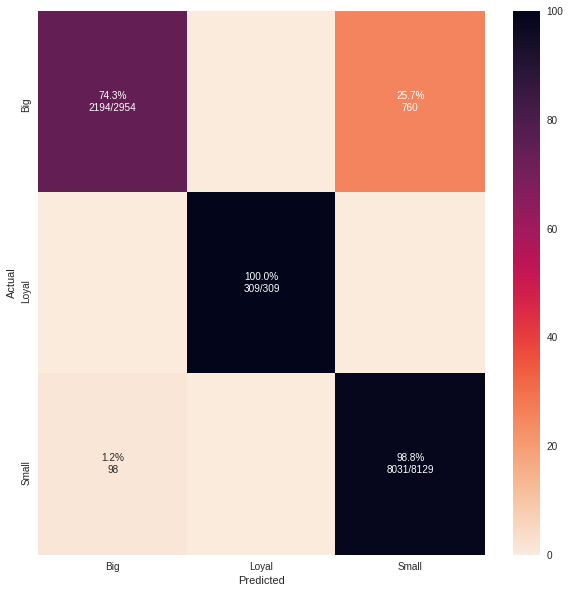

In [442]:
cm_analysis(label_true['cluster'], label_pred['cluster'],
            np.unique(label_pred['cluster']),
            ymap=None, figsize=(10,10))

## Controle periodicité 4 mois Apres

In [448]:
data_4month_after = analyseTime(table_segmentation,'2017-06',180)

In [449]:
data_4month_after = newRFM(data_4month_after)

In [450]:
X_total = preprocessing(data_4month_after)

column customer_state_other not in X_total
column favourite_categ_other not in X_total


In [451]:

label_pred = data_4month_after.copy()
label_true = data_4month_after.copy()

In [452]:
#def AriScore(X_total):
kmeans_Four_month = KMeans(n_clusters=5, 
                    verbose=1,
                    init='k-means++',
                    random_state=0,
                    n_jobs=-1).fit(X_total)

label_pred['label_kmeans'] = kmeans.predict(X_total)
label_true['label_kmeans'] = kmeans_Four_month.predict(X_total)

label_pred = name_cluster(label_pred)
label_true = name_cluster(label_true)

adjusted_rand_score(label_true['cluster'], label_pred['cluster'])

0.3930694450481551

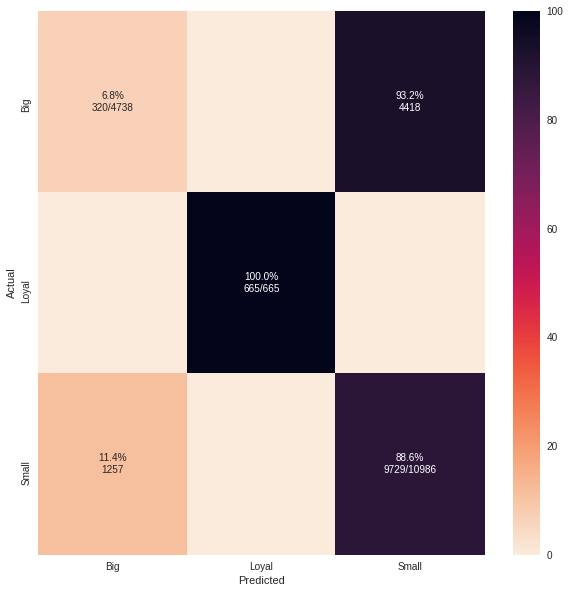

In [453]:
cm_analysis(label_true['cluster'], label_pred['cluster'],
            np.unique(label_pred['cluster']),
            ymap=None, figsize=(10,10))

## Controle periodicité 8 mois apres

In [460]:
data_8month_after = analyseTime(table_segmentation,'2018-01',90)

In [461]:
data_8month_after = newRFM(data_8month_after)

In [462]:
X_total = preprocessing(data_8month_after)

column customer_state_other not in X_total
column favourite_categ_other not in X_total


In [463]:

label_pred = data_8month_after.copy()
label_true = data_8month_after.copy()

In [464]:
kmeans_eight_month = KMeans(n_clusters=4, 
                    verbose=1,
                    init='k-means++',
                    random_state=0,
                    n_jobs=-1).fit(X_total)

label_pred['label_kmeans'] = kmeans.predict(X_total)
label_true['label_kmeans'] = kmeans_eight_month.predict(X_total)

label_pred = name_cluster(label_pred)
label_true = name_cluster(label_true)

adjusted_rand_score(label_true['cluster'], label_pred['cluster'])

0.8538857634773167

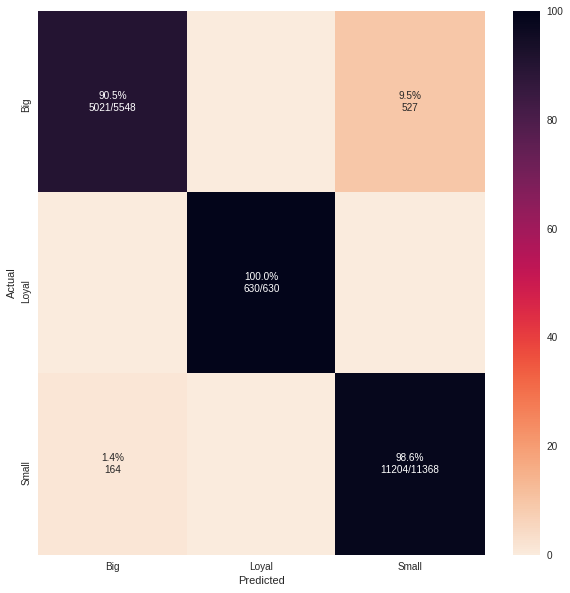

In [465]:
cm_analysis(label_true['cluster'], label_pred['cluster'],
            np.unique(label_pred['cluster']),
            ymap=None, figsize=(10,10))

## Synthese générale

Nous avons donc constaté que le jeu de donnée nous permet d'établir un schema fonctionnel concernant la mise en place d'une segmentation autour des clients.

nous avons pu mettre en avant plusieurs regroupement de clients ainsi que le profil dans le cadre de la mise en place d'une futur campagne marketing.



#### Conclusion de notre analyse
---

Ainsi, kmean est bien plus prometteur que dbscan, 

nous pouvons grace au resultat emettre une segmentation cohérente dans le cadre d'une future opération markéting.

Groupe cluster | signification | description | Catégorie de segmentation
----------------|---------------- |---------------- |------------|
cluster 0 |  clientèle Haut de Gamme non actif | achat a plus de 360 jr mais montant important| **Clientele à fort Potentielle**
cluster 1 |  clientèle grand public | achat de 50 euro env periode recente | **Clientèle à ne pas perdre** 
cluster 2 |  clientèle active| achat en myenne 70 Euro entre de 90 360 | **Champions**
cluster 3 |  clientèle active avec panier moyen 180 euro | clientèle ayant passé plus de 2 commandes | **Clientèle loyale**






